# Simulation
## Assignment 4.1 – Life sentence prisoners
#### Ari Viitala 432568

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import normaltest
from scipy.stats import rv_continuous, rv_discrete
from scipy.stats import expon, norm, poisson, gamma
from scipy.stats import linregress
%matplotlib inline

In [3]:
sentences = [3,2,5,8,2,5,5,4,3,4,3,4,12,8,6,16,5,5,7,7]
avg_lengths = [16.5, 11.7, 10.7]

In [4]:
#Does an D’Agostino and Pearson normality test
#with null hypothesis that numbers come from normal distribution
normaltest(sentences)

NormaltestResult(statistic=15.343477203807902, pvalue=0.00046580726588924546)

We ca see that the sentences are probably not normally distributed since the p-value is so small. Let's plot a histogram of the results and see what the distribution could be.

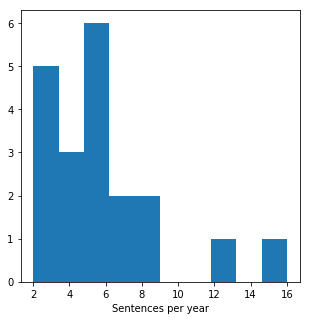

In [5]:
#plotting the sentence lengths
plt.figure(1, (5,5))
plt.hist(sentences)
plt.xlabel("Sentences per year")
plt.show()

The distribution could be Poisson. Let's try fitting one.

In [6]:
print(np.mean(sentences))

5.7


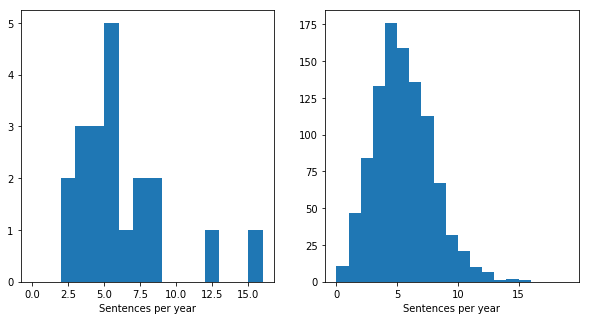

In [7]:
#plotting the sentence lengths and the fitted poisson distribution
plt.figure(1, (10,5))
plt.subplot(121)
plt.hist(sentences, bins = range(0,17))
plt.xlabel("Sentences per year")

plt.subplot(122)
plt.hist((np.random.poisson(5, 1000)), bins = range(0, 20)) 
plt.xlabel("Sentences per year")
plt.show()

We can see that the amount of life sentences given each year is somewhat a poisson process with meadian value of 5 senteces per year. This means that the time between senteces is exponetially distributed with rate $\lambda = \frac{1}{5}$. Here we have a bit more low results than the originla sample like 1s and 2s, but not too many.

In [8]:
print(np.mean(avg_lengths))
print(np.std(avg_lengths))

12.9666666667
2.53157833947


This is a pretty big assumption but let's say that the prison sentence lengths are normally distributed with mean of 13 years and standard deviation of 2.5 years. The duration is heavily influenced by the president and in the seventies it was Kekkonen and in the eighties it was Koivisto and most of the nineties it was Ahtisaari so the differences could be explained by just the different presidents.

### Function for simulating prison system

In [9]:
def simulation(lambda_s, avg_l, std_l, stop):
    
    t = 1981
    next_customer = t + np.random.exponential(lambda_s)
    next_release = 10000000
    
    customers = []
    times = []
    history = []
    
    while t < stop:
        if next_customer < next_release:
            t = next_customer
            customers.append(t + np.random.normal(avg_l, std_l))
            customers = sorted(customers)
            times.append(t)
            history.append(len(customers))
            next_customer = t + np.random.exponential(lambda_s)
            next_release = customers[0]
            
        else:
            t = next_release
            customers.pop(0)
            times.append(t)
            history.append(len(customers))
            if len(customers) > 0:
                next_release = customers[0]
            else:
                next_release = 10000000
    return times, history
            

### Driving the simulation with the deduced parameters until year 2030

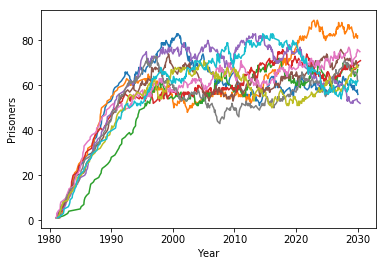

In [16]:
lambda_s = 0.2
avg_l = 13
std_l = 2.5
stop = 2030

for i in range(0, 10):
    sim = simulation(lambda_s, avg_l, std_l, 2030)
    plt.plot(sim[0], sim[1])

plt.xlabel("Year")
plt.ylabel("Prisoners")
plt.show()

From the plot we can see that the prison system settles to around 60 to 70 prisoners serving the life sentence. This result seems reasonable considering the data at hand and assuming constat rate of life sentences but actually there were over 200 prisoners serving the life sentence in the year 2014 [1]. This is three times as many as the simulation would suggest.

Let's try increasing the ammount of people taken in yearly.

Text(0,0.5,'Prisoners')

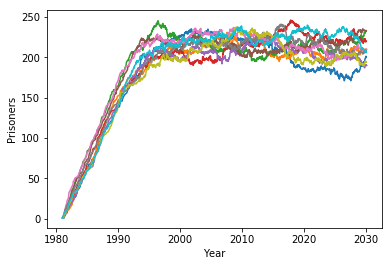

In [11]:
lambda_s = 0.06
avg_l = 13
std_l = 2.5
stop = 2030

for i in range(0, 10):
    sim = simulation(lambda_s, avg_l, std_l, 2030)
    plt.plot(sim[0], sim[1])

plt.xlabel("Year")
plt.ylabel("Prisoners")
plt.show()

If we increase the amount of people getting life sentence to about 20 per year we get naturally a much higher steady state but this is still not correct.

So far we have assumed that the average amount of yearly life sentences would remain constant. However, this might not be a valid assumption. Let's plot a scatter plot of the amount of people people who get the life sentence yearly. 

Text(0,0.5,'Life sentences')

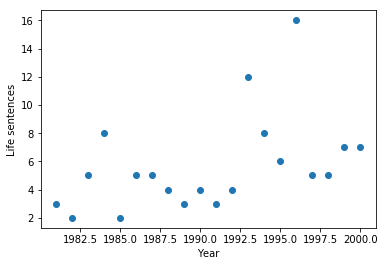

In [12]:
time = list(range(1981,2001))
plt.scatter(list(range(1981,2001)), sentences)
plt.xlabel("Year")
plt.ylabel("Life sentences")
plt.show()

If we use our imagination we can see that there is an increasion trend in life sentences. So let's try fitting a linear model to the data.

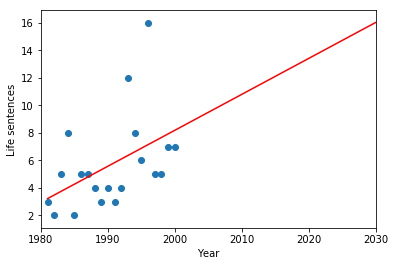

In [13]:
line = np.polyfit(time, sentences, 1)

pred_time = np.array(range(1981, 2031))
pred = pred_time * line[0] + line[1]

plt.plot(pred_time, pred, c = "red")
plt.scatter(time, sentences)
plt.xlim(1980, 2030)
plt.xlabel("Year")
plt.ylabel("Life sentences")
plt.show()

Let's create a new simulation function that will incorporate the increasing rate of life sentences.

In [14]:
def simulation2(lambda_s, avg_l, std_l, stop):
    
    t = 1981
    next_customer = t + np.random.exponential(lambda_s[int(t) - 1981])
    next_release = 10000000
    
    customers = []
    times = []
    history = []
    
    while t < stop:
        if next_customer < next_release:
            t = next_customer
            customers.append(t + np.random.normal(avg_l, std_l))
            customers = sorted(customers)
            times.append(t)
            history.append(len(customers))
            next_customer = t + np.random.exponential(lambda_s[int(t) - 1981])
            next_release = customers[0]
            
        else:
            t = next_release
            customers.pop(0)
            times.append(t)
            history.append(len(customers))
            if len(customers) > 0:
                next_release = customers[0]
            else:
                next_release = 10000000
    return times, history

Text(0,0.5,'Prisoners')

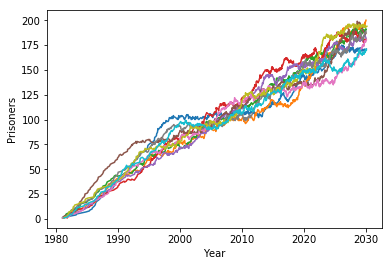

In [15]:
lambda_s = 1 / pred
avg_l = 13
std_l = 2.5
stop = 2030

for i in range(0, 10):
    sim = simulation2(lambda_s, avg_l, std_l, 2030)
    plt.plot(sim[0], sim[1])
plt.xlabel("Year")
plt.ylabel("Prisoners")
plt.show()

Now we get a result that is much closer to the truth. However this is still a bit lacking since this model achieves the level of prisoners that were in prison 2014 by 2030. However the change that has led to the current situation is not clearly visible in the dataset at hand so I don't think there are more reasonable assumptions that could be made based on the data.

### Sources:

[1] http://www.rikosseuraamus.fi/material/attachments/rise/julkaisut-monisteetjaraportit/c93POV0xz/2014-5_ELINKAUTISVANKIEN_UUSINTARIKOLLISUUDESTA.pdf